<a href="https://colab.research.google.com/github/jinn9403/Analyzing_News-1-/blob/main/analyzing_news1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

뉴스 기사 요약 리포트 만들기

인코딩 => 디코딩 => 키워드 추출 => 문서 요약(html파일로 저장)

사용 라이브러리 :
인코딩, 디코딩(base64)
키워드 추출, 문자열 처리(textwrap, re, collections)
요약 라이브러리(gensim)
파일 작성 및 저장(open, close library)

바이너리 파일을 문자열로 변경
-2진수 데이터 만으로 인코딩된 파일로, 사람이 읽을 수는 없지만 데이터 처리에 효율적이고, 속도도 빠르며, 저장도 효과적임.

- Base64 인코딩 : 다양한 통신채널(이메일 등)을 통해 바이너리 데이터를 안전하게 송신하는 방법으로, ASC2, Unicode 인코딩과 같이 많이 쓰임. 또한 특수문자까지 인코딩 할 수 있다는 장점이 있으며, 64진법은 ㄴ아스키 문자들을 모두 표현 할 수 있는 가장 작은 진법이다.

문자열 임력 => Asc2/Binary(8bit) => 6 bit cut => base64

In [ ]:
import base64

In [ ]:
string = 'Life is too short. We need Python'

In [ ]:
encoded = base64.b64encode(string)
#base64 에서 b64ecode를 사용하여 인코딩을 시도한다.
#bite 형식의 객체만 인코딩을 할 수 있다. => 아스키 인코딩을 커쳐줘야한다.

TypeError: ignored

In [ ]:
#asc 2 인코딩
bstring = string.encode('ascii')
#bite 형식의 string, bstring
print(bstring)

b'Life is too short. We need Python'


In [ ]:
encoded = base64.b64encode(bstring)

In [ ]:
print(encoded)

b'TGlmZSBpcyB0b28gc2hvcnQuIFdlIG5lZWQgUHl0aG9u'


In [ ]:
decoded = base64.decodebytes(encoded)
#decodebytes 함수를 사용하여 디코딩을 해준다

In [ ]:
print(decoded)

b'Life is too short. We need Python'


In [ ]:
decoded_string = decoded.decode('ascii')
#decode 함수 이용, decoded를 decode 해라

In [ ]:
print(decoded_string)

Life is too short. We need Python


이미지 인코딩/디코딩

In [ ]:
import base64
path = "/content/drive/MyDrive/IMG_0646.jpg"

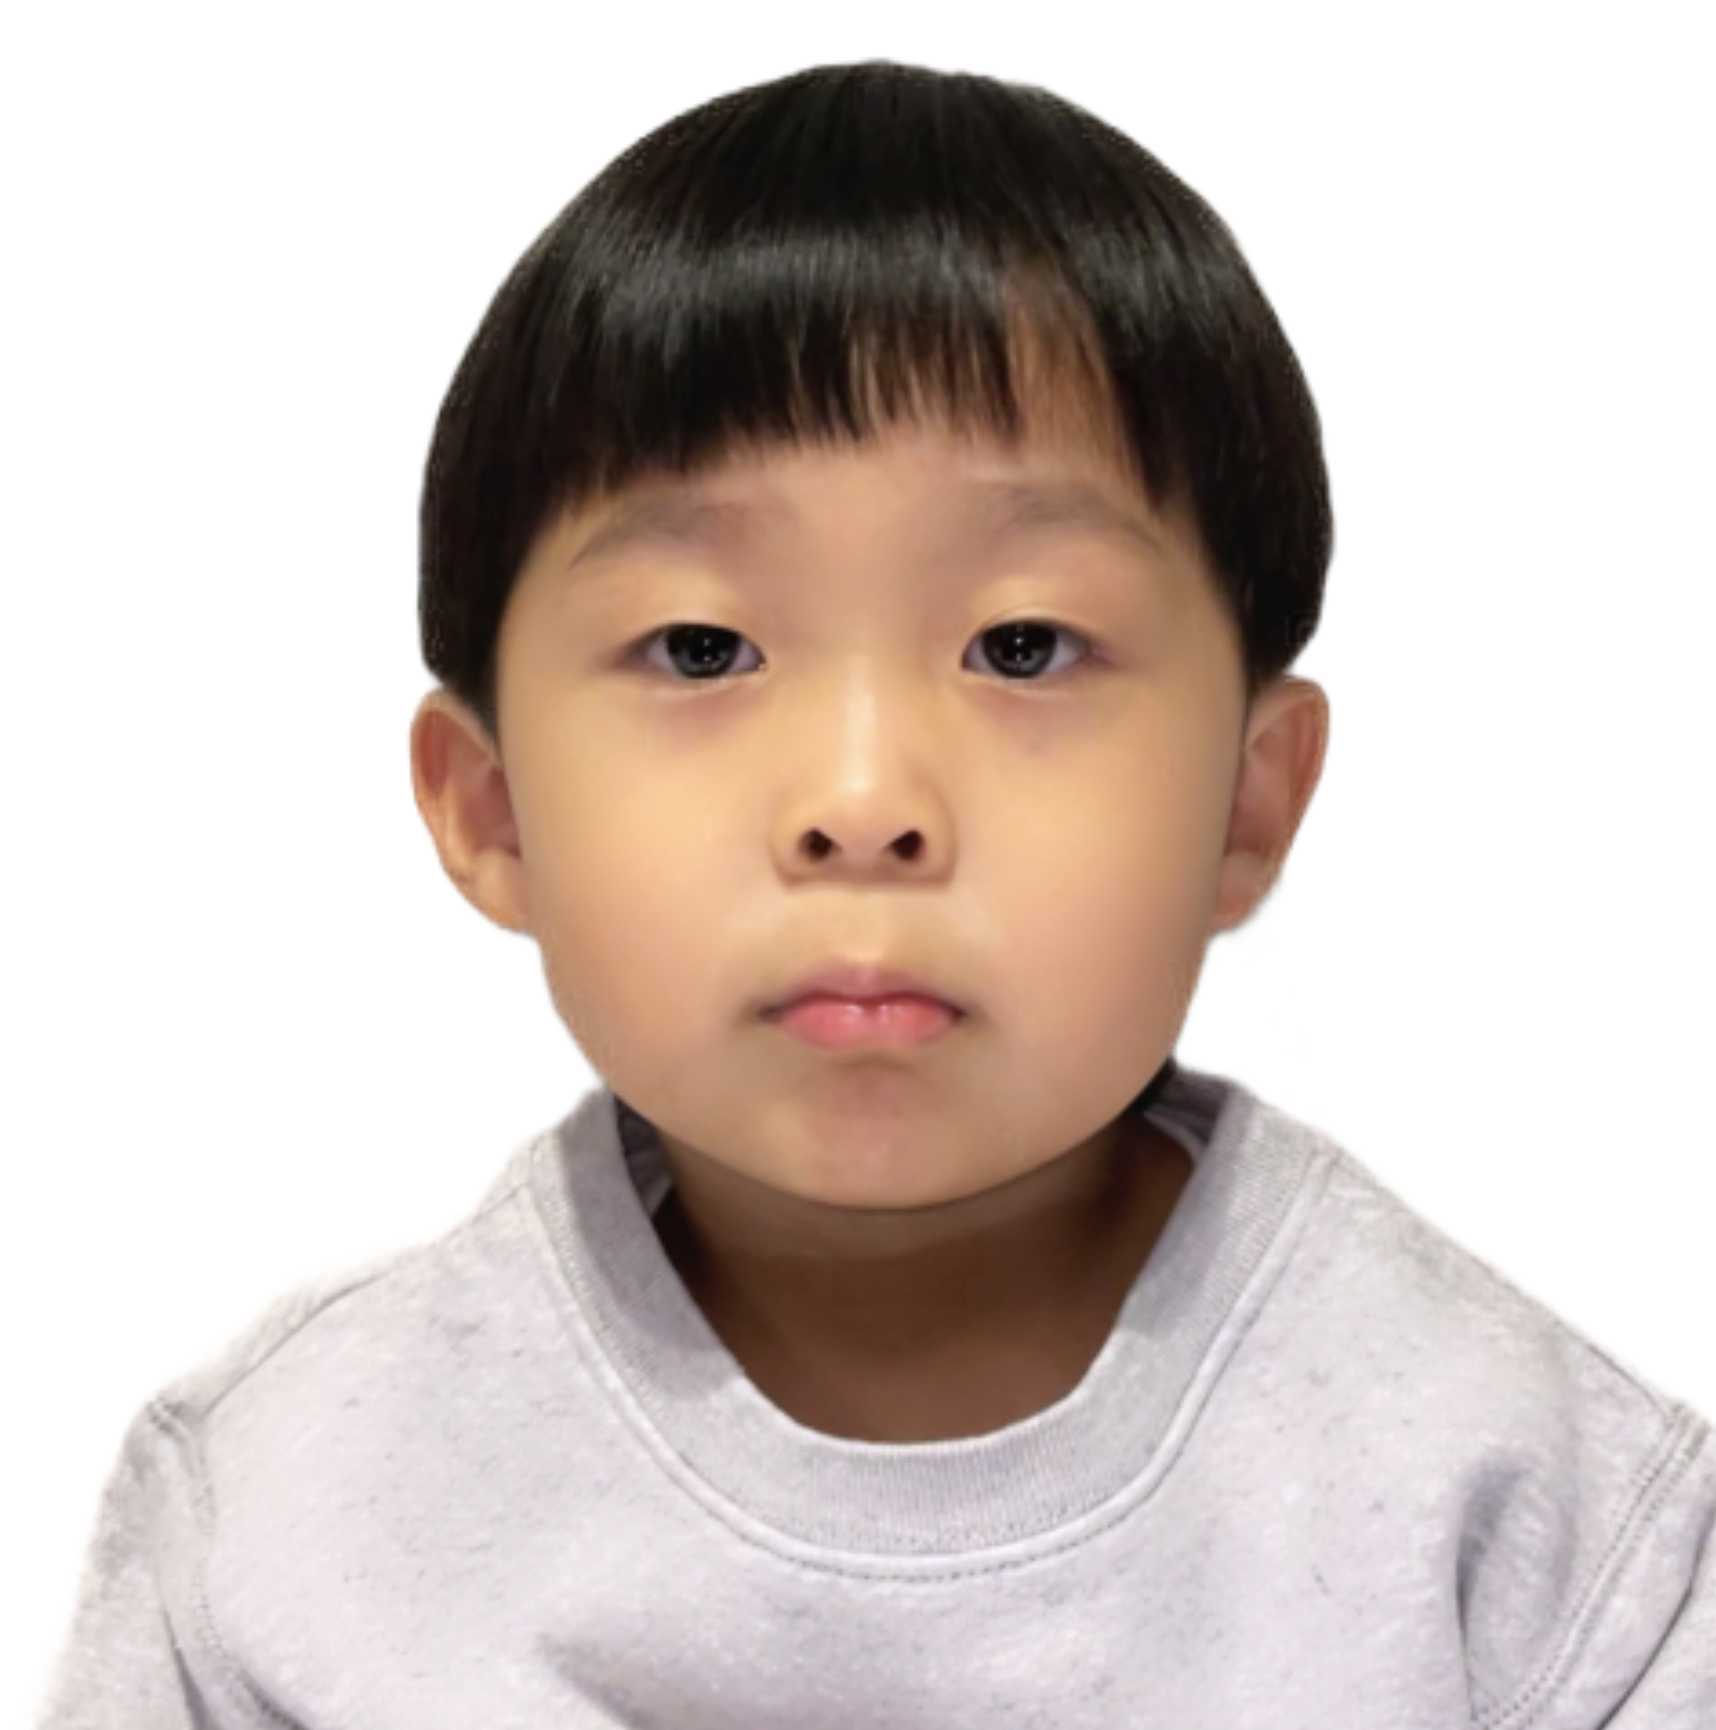

In [ ]:
#dlalwl ghkrdls
#아나콘다 prompt 외부 라이브러리 설치,
from PIL import Image
img = Image.open(path)
img

In [ ]:
#코랩에서는 이미지를 구글드라이브에서 가져올 수 있음으로 mount 필요
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


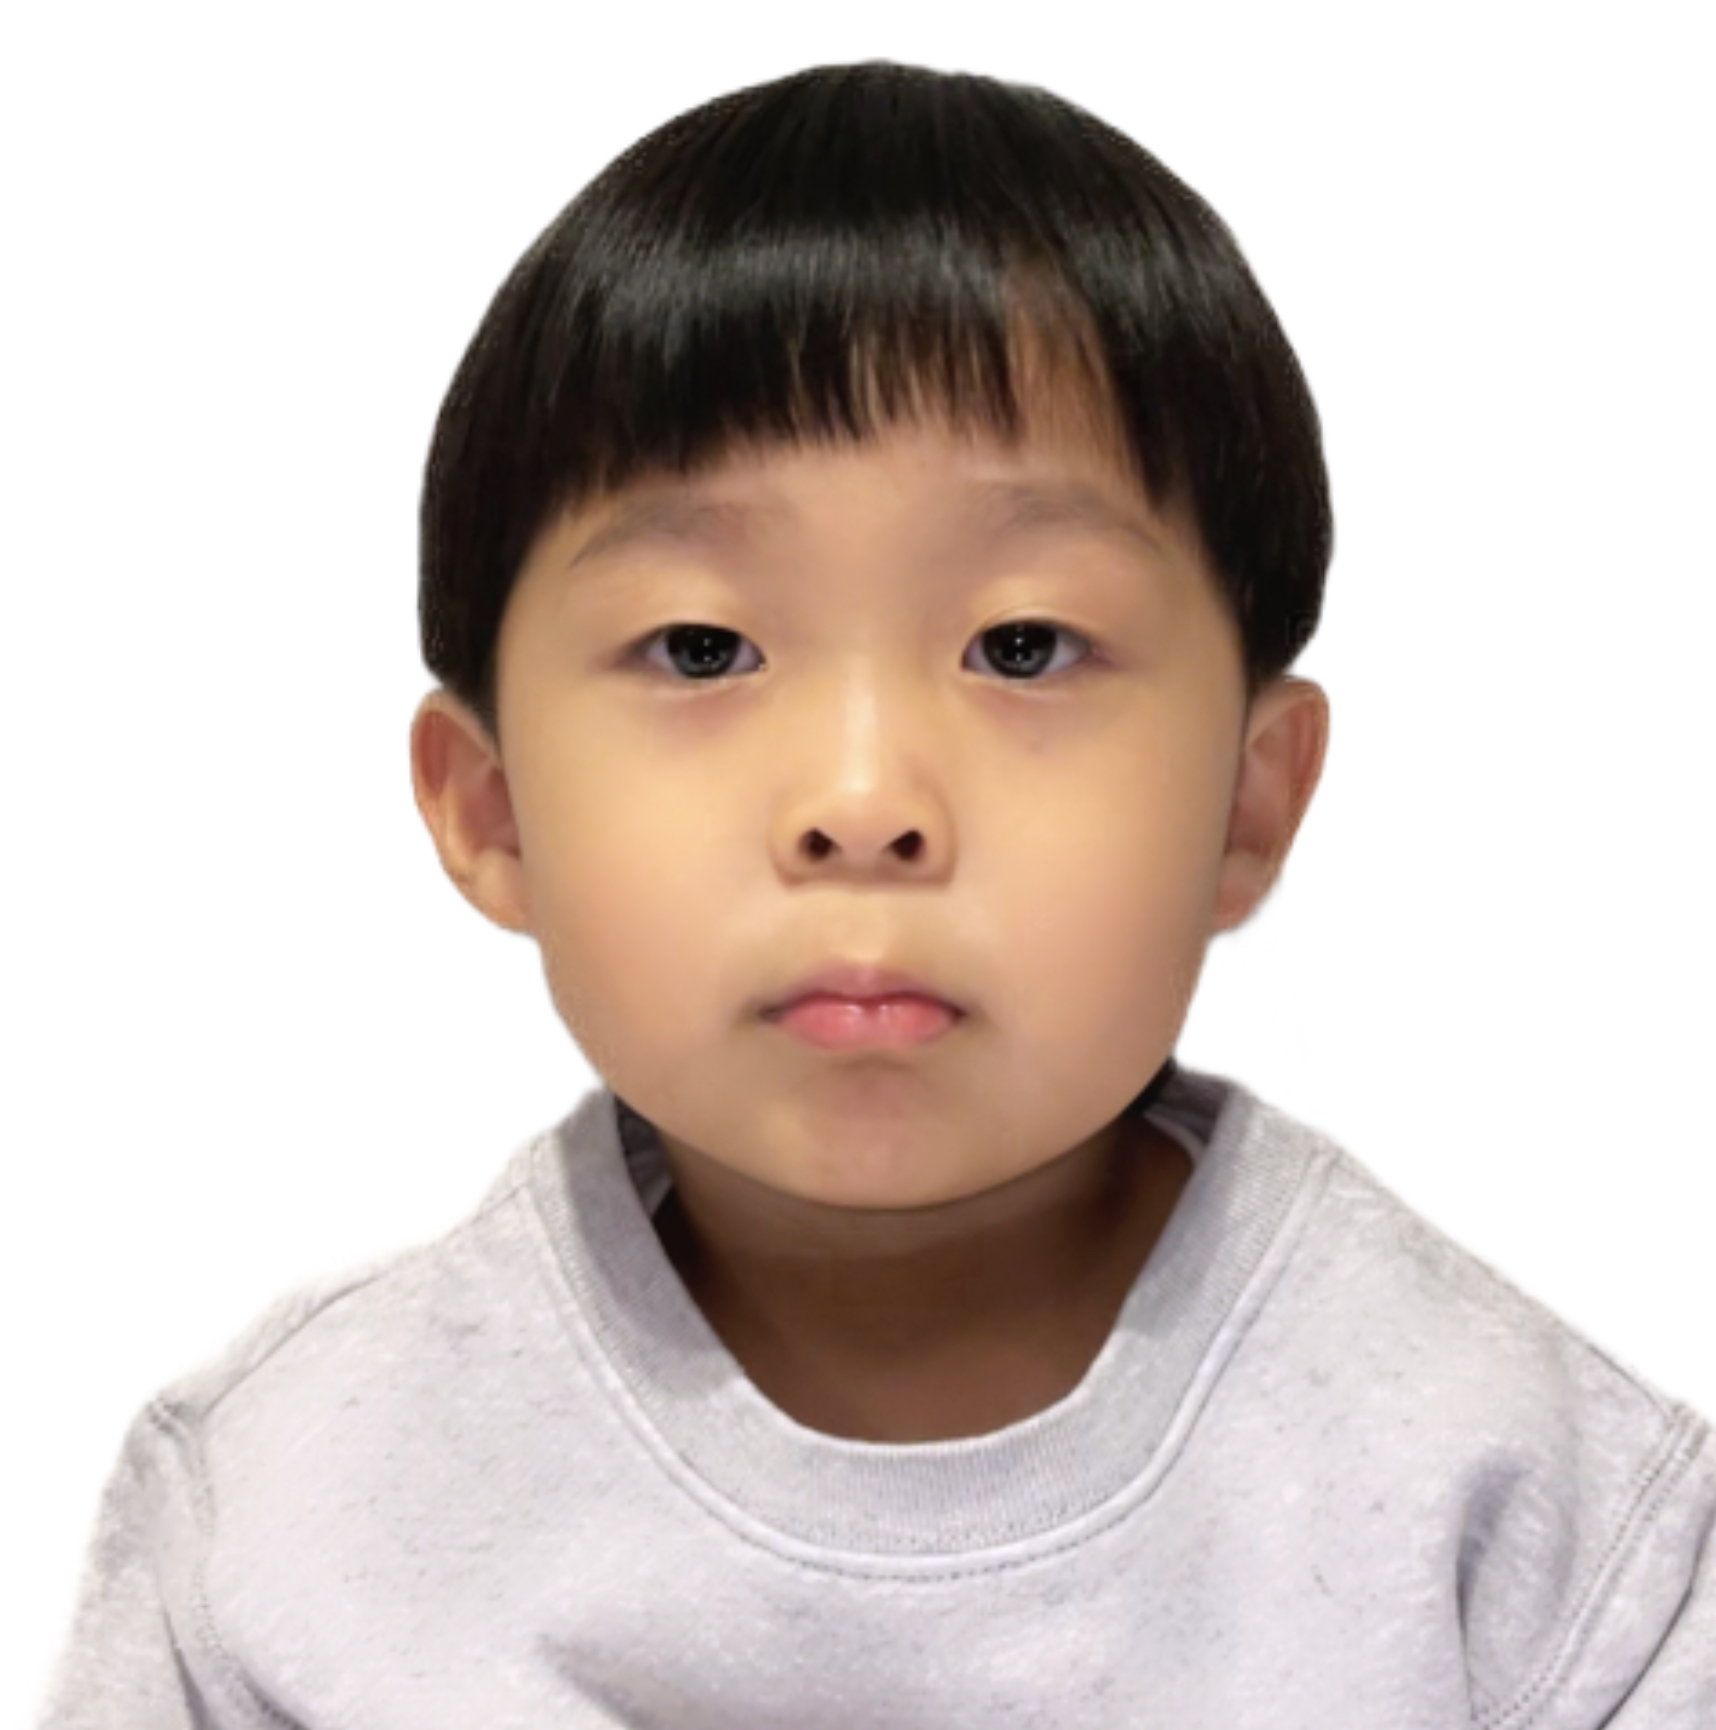

In [ ]:
import numpy as np
import cv2
#이미지를 읽을 수 있는 tool
from google.colab.patches import cv2_imshow
def handle_image():
  #이미지 읽어오기
  imgfile = '/content/drive/MyDrive/IMG_0646.jpg'
  img = cv2.imread(imgfile, cv2.IMREAD_COLOR)
  imgfile = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  cv2_imshow(img)

if __name__ == '__main__':
  handle_image()

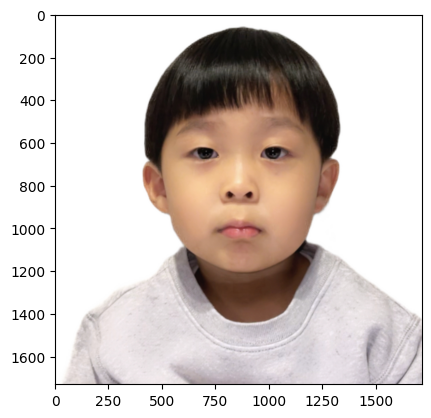

In [ ]:
#Matplotlib을 이용해서 이미지 출력
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/IMG_0646.jpg'
img = plt.imread(img_path)
plt.imshow(img)

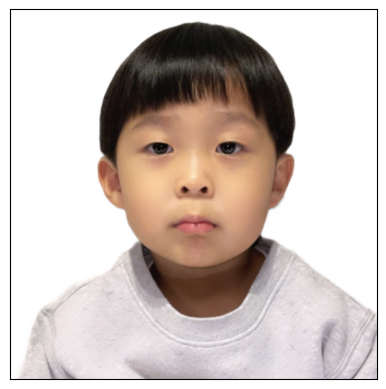

In [ ]:
# 가로 세로 축을 없애고 싶다면
frm = plt.gca()

img = plt.imread(img_path)
frm.imshow(img)

frm.axes.get_xaxis().set_visible(False)
frm.axes.get_yaxis().set_visible(False)

In [ ]:
#바이너리 파일 읽기
with open(path, 'rb') as img:
  #r : read, b : bite, open 모듈 활용
  image = img.read()
#image

PIL을 이용하는 방법(이번 실습간 이 방법 사용)

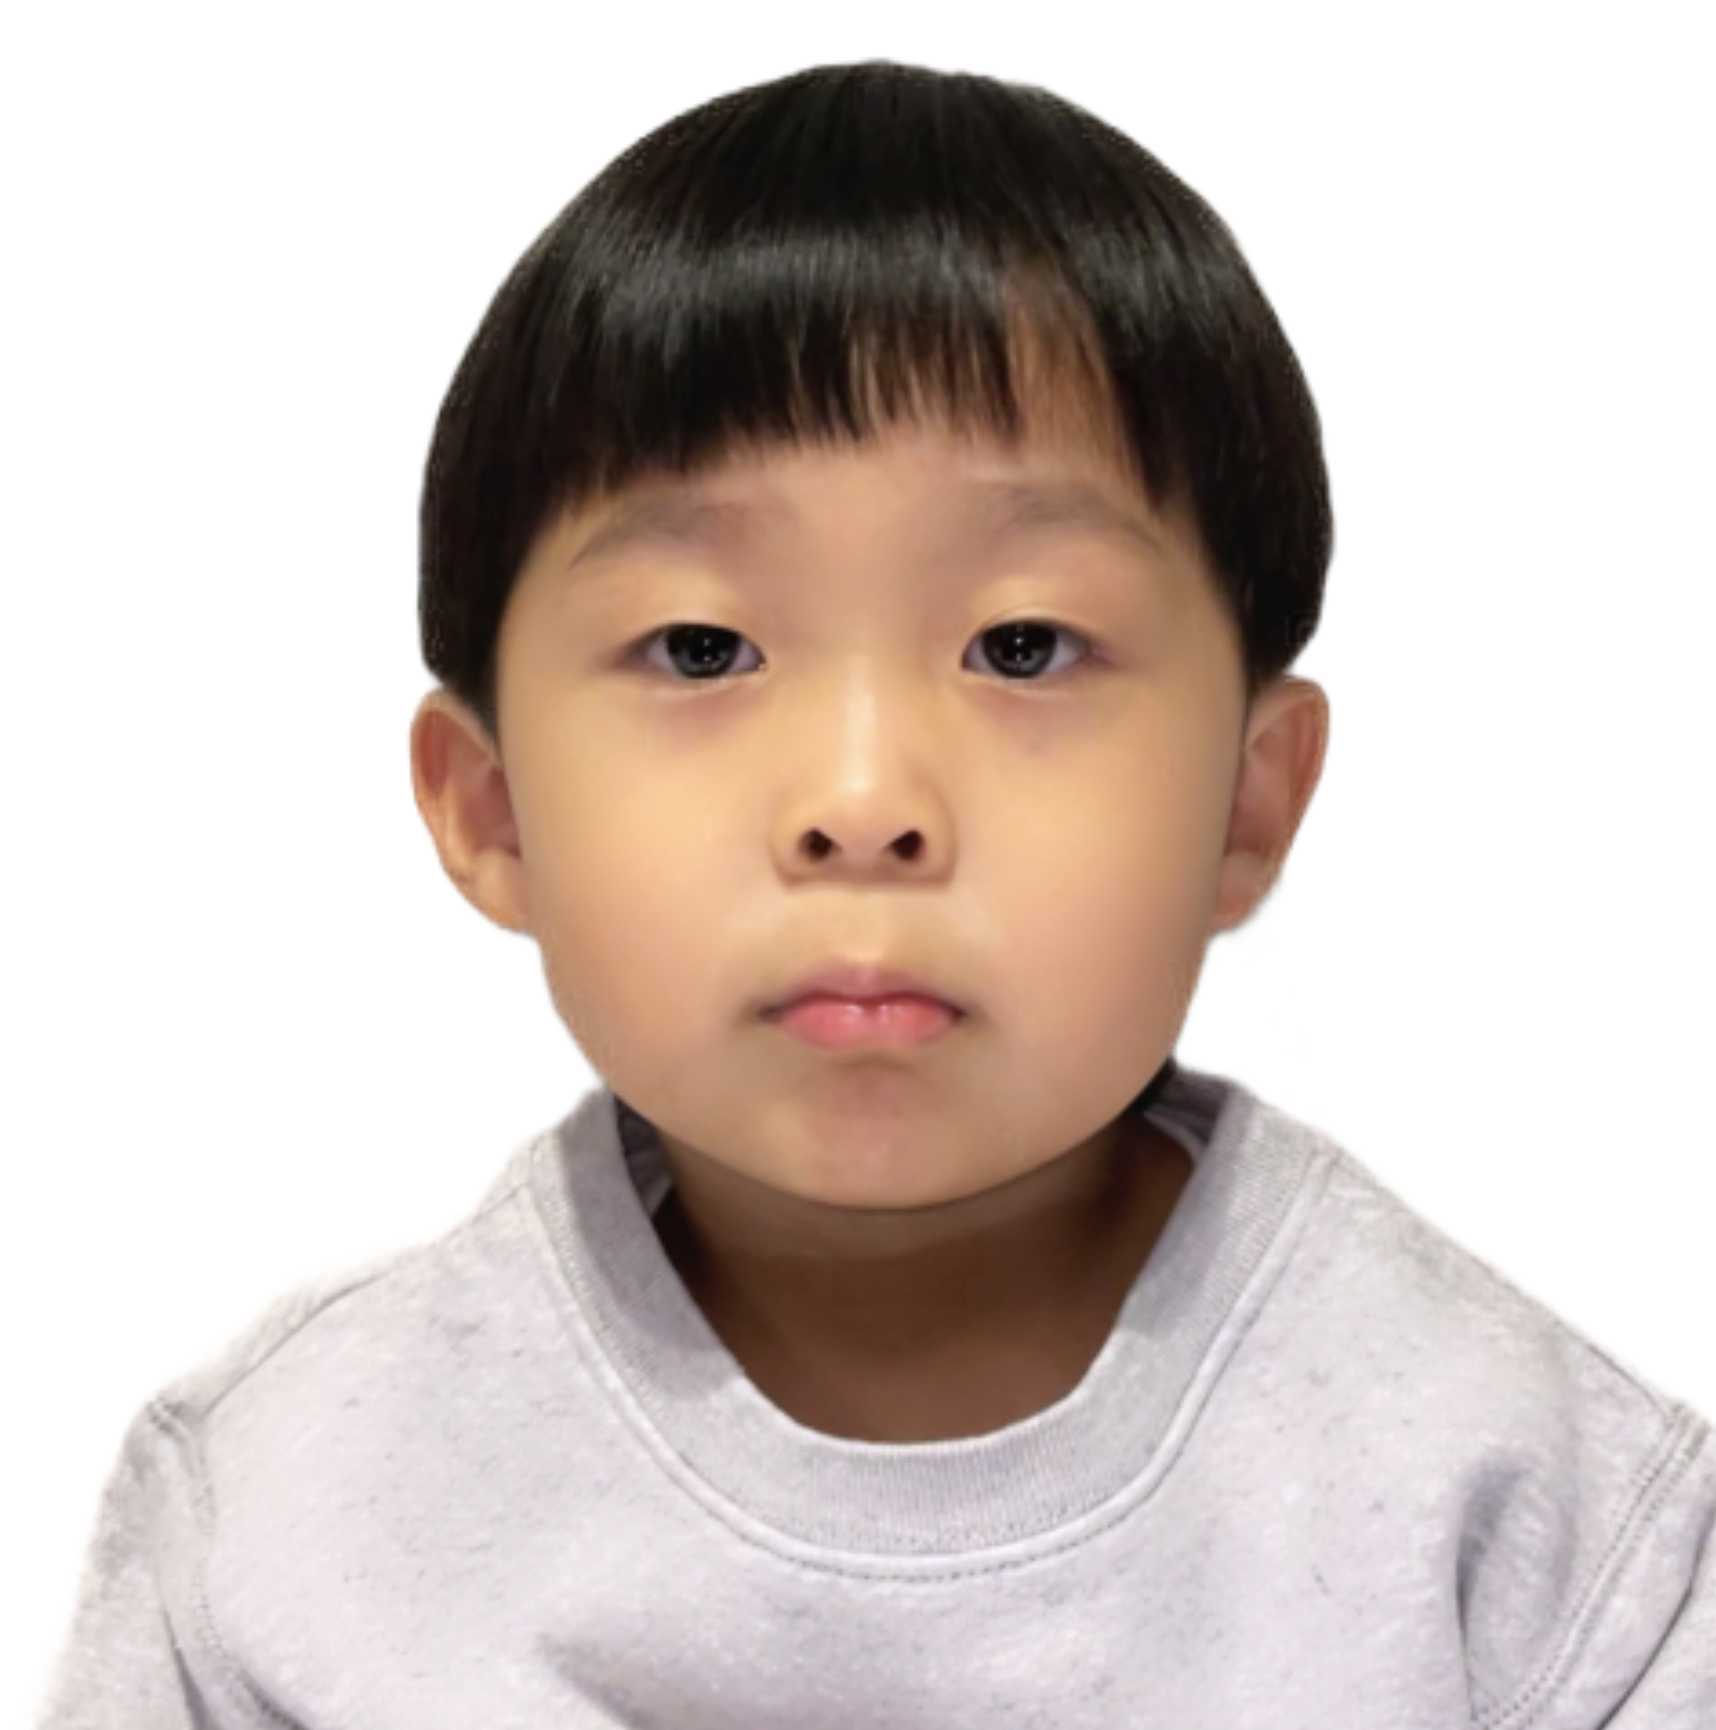

In [ ]:
#PIL을 이용하는 방법

import PIL.Image as pil

img = pil.open(img_path)
img
#가장 짧은 대신 원본 이미지 크기로 출력됨



In [ ]:
#바이트 정보 확인
!pip install bitstring
#외부 라이브러리 다운
from bitstring import BitArray
input_str = '0xff'
#0xff는 뭘 말하는 걸까? 확인
c = BitArray(hex = input_str)
c.bin

'11111111'

In [ ]:
#base64 인코딩
with open(path, 'rb') as img :
          data = img.read()
          encoded = base64.b64encode(data)
          print(encoded)
#이 형태로 메일을 보내게 된다.


b'/9j/4AAQSkZJRgABAQAAkACQAAD/4QCARXhpZgAATU0AKgAAAAgABQESAAMAAAABAAEAAAEaAAUAAAABAAAASgEbAAUAAAABAAAAUgEoAAMAAAABAAIAAIdpAAQAAAABAAAAWgAAAAAAAACQAAAAAQAAAJAAAAABAAKgAgAEAAAAAQAABrSgAwAEAAAAAQAABsIAAAAA/+0AOFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAAOEJJTQQlAAAAAAAQ1B2M2Y8AsgTpgAmY7PhCfv/iAihJQ0NfUFJPRklMRQABAQAAAhhhcHBsBAAAAG1udHJSR0IgWFlaIAfmAAEAAQAAAAAAAGFjc3BBUFBMAAAAAEFQUEwAAAAAAAAAAAAAAAAAAAAAAAD21gABAAAAANMtYXBwbOz9o444hUfDbbS9T3raGC8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACmRlc2MAAAD8AAAAMGNwcnQAAAEsAAAAUHd0cHQAAAF8AAAAFHJYWVoAAAGQAAAAFGdYWVoAAAGkAAAAFGJYWVoAAAG4AAAAFHJUUkMAAAHMAAAAIGNoYWQAAAHsAAAALGJUUkMAAAHMAAAAIGdUUkMAAAHMAAAAIG1sdWMAAAAAAAAAAQAAAAxlblVTAAAAFAAAABwARABpAHMAcABsAGEAeQAgAFAAM21sdWMAAAAAAAAAAQAAAAxlblVTAAAANAAAABwAQwBvAHAAeQByAGkAZwBoAHQAIABBAHAAcABsAGUAIABJAG4AYwAuACwAIAAyADAAMgAyWFlaIAAAAAAAAPbVAAEAAAAA0yxYWVogAAAAAAAAg98AAD2/////u1hZWiAAAAAAAABKvwAAsTcAAAq5WFlaIAAAAAAAACg4AAARCwAAyLlwYXJhAAAAAAADAAAAAmZmAADypwAADVkAABPQAAAKW3NmMzIAAAAAAAEMQgAABd7///MmAAAHkwAA/ZD///

디코딩

In [ ]:
decoded = base64.decodebytes(encoded)
print(decoded)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#이미지 파일로 저장
file = "/content/download/decoded.png"

with open(file, 'wb') as file :
  #wright, byte wb 모듈 사용
  file.write(decoded)

FileNotFoundError: ignored